In [346]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import grid
from torchvision.transforms.functional import rgb_to_grayscale
import cv2
from skimage import measure 
import imutils 
import matplotlib.patches as patches
from IPython.display import Image
import torchvision 


from torchvision.utils import make_grid



In [321]:
ii2 = cv2.imread('E:\\cropped_box1.jpg')

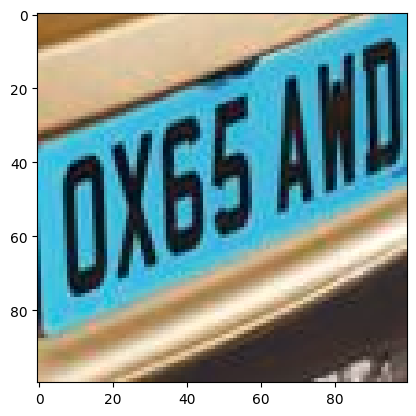

In [322]:

img2 = np.array(ii2)
plt.imshow(img2)

In [374]:
def segment_chars(plate_img): 

    V = cv2.split(cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV))[2] 
    thresh = cv2.adaptiveThreshold(V, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) 

    thresh = cv2.bitwise_not(thresh) 
    labels = measure.label(thresh, background = 0) 
    charCandidates = np.zeros(thresh.shape, dtype ='uint8') 
    characters = [] 
    BoxXX = []
    BoxXY = []
    BoxXW = []
    BoxXH = []
    for label in np.unique(labels): 

        if label == 0: 

            continue
    
        labelMask = np.zeros(thresh.shape, dtype ='uint8') 
        labelMask[labels == label] = 255
        cnts = cv2.findContours(labelMask,  cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE) 
        cnts = cnts[1] if imutils.is_cv3() else cnts[0] 
        if len(cnts) > 0: 
            c = max(cnts, key = cv2.contourArea) 
            (boxX, boxY, boxW, boxH) = cv2.boundingRect(c) 
        BoxXX.append(boxX)
        BoxXY.append(boxY)
        BoxXW.append(boxW)
        BoxXH.append(boxH)

    position = []      
    
    for contour in range(len(BoxXX)):
        if (BoxXW[contour]/float(BoxXH[contour])<1.0):
            if ((BoxXW[contour]<5) or (BoxXH[contour]> 95 or BoxXH[contour] < 30)):
                continue 
            else:
                position.append(contour)
                
    PositionX = [] 
    PositionY = []
    PositionW = []
    PositionH = []

    
    for i in reversed(position):
        PositionX.append(BoxXX[i])
        PositionY.append(BoxXY[i])
        PositionW.append(BoxXW[i])
        PositionH.append(BoxXH[i])


    
       
    return PositionX,PositionY,PositionW,PositionH


In [375]:
BoxXX,BoxXY,BoxXW,BoxXH = segment_chars(img2)

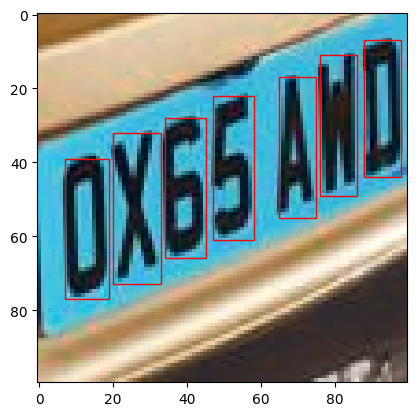

In [376]:
fig, ax = plt.subplots()

ax.imshow(img2)
# Add the patch to the Axes



for contour in range(len(BoxXX)):
    rect = patches.Rectangle((BoxXX[contour], BoxXY[contour]), BoxXW[contour], BoxXH[contour], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect) 

plt.show()


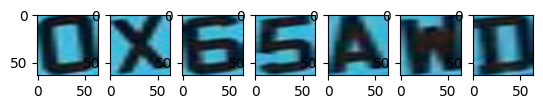

In [378]:
f, axarr = plt.subplots(1,len(BoxXX))
for indeks in range(len(BoxXX)):
    axarr[indeks].imshow(cv2.resize(img2[BoxXY[indeks]:(BoxXY[indeks]+BoxXH[indeks]),BoxXX[indeks]:(BoxXX[indeks]+BoxXW[indeks]),:], (64,64)))


numpy.ndarray